# Avocado Price Forecasts

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from fbprophet import Prophet


In [50]:
#Loading all the csv files
df = pd.read_csv("avocado.csv")

In [109]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [110]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Conventional vs Organic Avocadoes:

In [111]:
df1['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



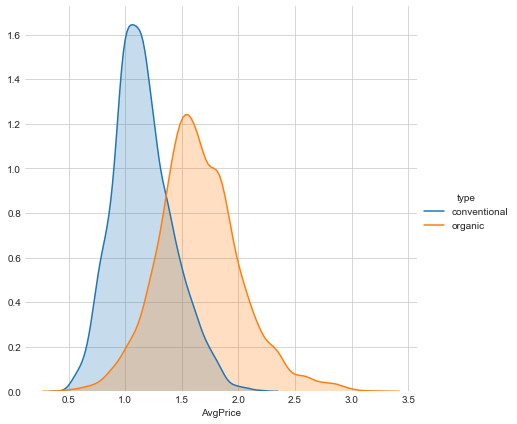

In [112]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df1,hue='type',size=6)
g.map(sns.kdeplot,'AveragePrice',shade=True)
g.add_legend()
plt.xlabel('AvgPrice')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [ ]:
#Function for selecting region and type
def reg(r,t):
    dfs = df1[(df1.region ==r) & (df1.type == t) ]
    dfs1=dfs.set_index('Date')
    return dfs1   

All the analysis that follows is for the region and type selected in the below cell.

Enter below the Region and Type of the Avocado:

In [188]:
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime
df2=reg('TotalUS','conventional')  #<<<<-------------Enter the region and type here----------------->>>>


# Distribution of Avg Price over time :

In [189]:
trace = go.Scatter(
    x = df2.index,
    y = df2.AveragePrice,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data,filename='basicscatter')

# Average Price Distribution : 

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



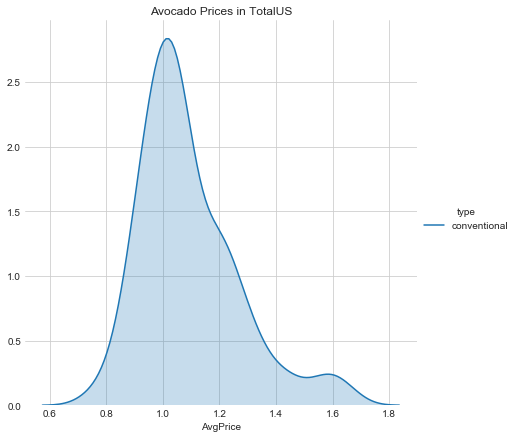

In [182]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df2,hue='type',size=6)
g.map(sns.kdeplot,'AveragePrice',shade=True)
g.add_legend()
plt.xlabel('AvgPrice')
plt.title('Avocado Prices in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

# Forecasting the future prices of Avocado (Using FBPROPHET)

In [190]:
df2.reset_index(inplace=True) #Removing the datetime index

In [191]:
date_price = df2.rename(columns={'Date':'ds', 'AveragePrice':'y'})

Fitting the model Using Prophet: 

In [192]:
m = Prophet()
m.fit(date_price)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Shreyansh\New folder\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



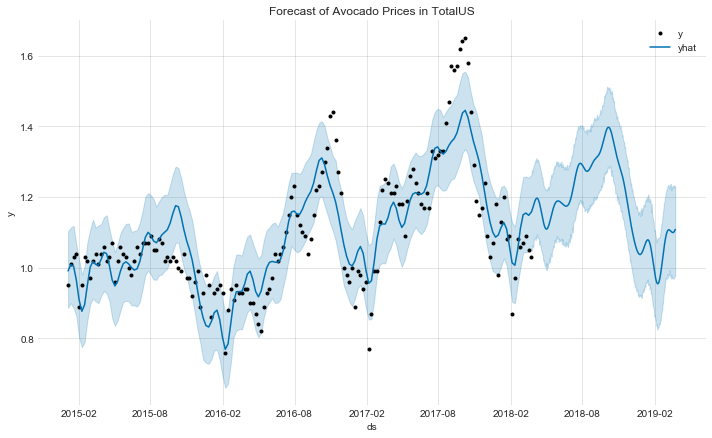

In [193]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.legend()
plt.title('Forecast of Avocado Prices in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In the above figure 'yhat' is the forecasted Avocado Prices in the year 2019

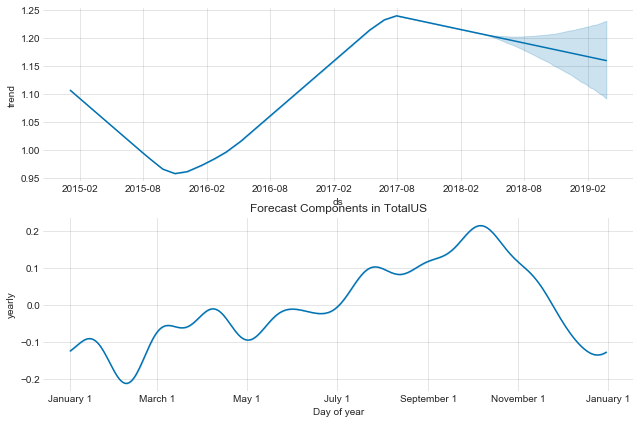

In [194]:
fig2 = m.plot_components(forecast)
plt.title('Forecast Components in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

                                                                                                       ---References : Kaggle